In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [2]:
data_dir = "./data"
image_size = (64, 64)
labels = ['aeyn', 'alif', 'alif_lam', 'ba2', 'daal', 'dha2', 'dhaad', 'fa2', 'gaf', 'ghayn', 'haa', 'haa2', 'jeeem', 'kaaaf', 'khaaa', 'laa', 'laaam', 'meeem', 'nuun', 'ra2', 'saaad', 'seeen', 'sheeen', 'ta2', 'taa', 'thaaa', 'thaal', 'toott', 'waaw', 'yaa', 'yaa2', 'zaay']


In [3]:
images = []
labels_list = []

for label in labels:
    label_dir = os.path.join(data_dir, label)
    for image_name in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_name)
        image = load_img(image_path, color_mode='grayscale', target_size=image_size)
        image_array = img_to_array(image)
        images.append(image_array)
        labels_list.append(label)

images = np.array(images)
labels_list = np.array(labels_list)

In [4]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels_list)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(images, encoded_labels, test_size=0.2, random_state=42)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [6]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (34601, 64, 64, 1)
y_train shape: (34601,)
x_test shape: (8651, 64, 64, 1)
y_test shape: (8651,)


In [33]:
import matplotlib.pyplot as plt
def plot_samples(x, y, indices):
    n = len(indices)
    plt.figure(figsize=(15, 5))
    for i, index in enumerate(indices):
        plt.subplot(1, n, i + 1)
        plt.imshow(x[index])
        plt.xlabel(labels[y[index]])
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout()
    plt.show()

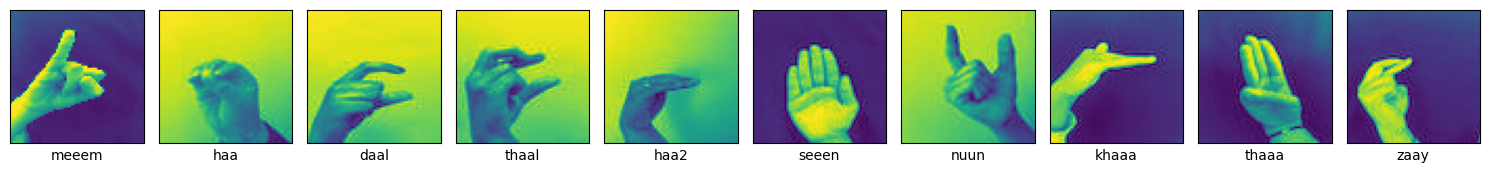

In [35]:
plot_samples(x_train,y_train,[i for i in range(10)])

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

model = Sequential([
    Input(shape = (64, 64, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(labels), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,704 (6.21 MB)

 Trainable params: 1,628,704 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

None


In [9]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 118s 105ms/step - accuracy: 0.2319 - loss: 2.6942 - val_accuracy: 0.8111 - val_loss: 0.7780
Epoch 2/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 146s 109ms/step - accuracy: 0.6501 - loss: 1.0660 - val_accuracy: 0.9034 - val_loss: 0.4051
Epoch 3/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 149s 115ms/step - accuracy: 0.7557 - loss: 0.7432 - val_accuracy: 0.9280 - val_loss: 0.3026
Epoch 4/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 122s 113ms/step - accuracy: 0.8051 - loss: 0.5966 - val_accuracy: 0.9421 - val_loss: 0.2467
Epoch 5/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 168s 136ms/step - accuracy: 0.8346 - loss: 0.4972 - val_accuracy: 0.9449 - val_loss: 0.2169
Epoch 6/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 235s 217ms/step - accuracy: 0.8571 - loss: 0.4122 - val_accuracy: 0.9496 - val_loss: 0.2011
Epoch 7/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 244s 200ms/step - accuracy: 0.8733 - loss: 0.3657 - val_accuracy: 0.9511 - val_loss: 0.1893
Epoch 8/10
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 226s 209ms/step - ac

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

271/271 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.9577 - loss: 0.1823
Test accuracy: 0.9566524028778076


In [24]:
y_pred = model.predict(x_test)

271/271 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step


In [28]:
import numpy as np
print(y_test[:10])
print([np.argmax(item) for item in y_pred[:10]])

[ 8 30 22 15 18 16 15  4  6 29]
[8, 30, 22, 15, 18, 16, 15, 4, 6, 29]


In [ ]:
for i in range(10):
    plot_samples(x_test,y_pred,i)